<a href="https://colab.research.google.com/github/narsym/deep-learning-with-tensorflow-2.0/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Simple regression example

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Generating data with linear relationship and noise

In [0]:
np.random.seed(0)
area = 2.5 * np.random.randn(100) + 25
price = 25 * area + 5 + np.random.randint(20,50,size = len(area))

Creating Data Frame

In [0]:
data = np.array(([area,price]))
data = pd.DataFrame(data = data.T, columns = ['area','price'])

Plotting the data

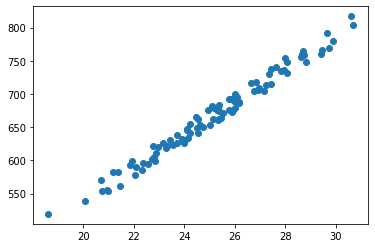

In [0]:
plt.scatter(data['area'],data['price'])
plt.show()

Calculate regression line using formula

In [0]:
W = sum(price * (area - np.mean(area))) / sum((area - np.mean(area))** 2)
b = np.mean(price) - W * np.mean(area)
print('The regression coefficients are:', W, b)

The regression coefficients are: 24.815544052284988 43.4989785533412


Let's predict the prices

In [0]:
y_pred = W * area + b

Plot the predicted prices with the actual prices

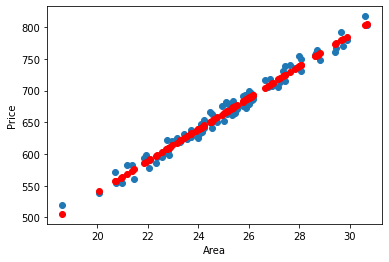

In [0]:
plt.scatter(data['area'],data['price'],label = 'Training data')
plt.scatter(area,y_pred,color = 'red',label = 'Predicted Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

#Tensorflow Estimators

**1.Feature columns**

**2.Input functions**

**tf.feature_columns**

* **categorical_column_with_identity**: Here each category is one-hot encoded, and thus has a unique identity. This can be used for numeric values only.

* **categorical_column_with_vocabulary_file**: This is used when the categorical input is a string and the categories are given in a file. The string is first converted to a numeric value and then one-hot encoded.

* **categorical_column_with_vocabulary_list**: This is used when the categorical input is a string and the categories are explicitly defined in a list. The string is first converted to a numeric value and then one-hot encoded.

* **categorical_column_with_hash_bucket**: In case the number of categories is very large, and it is not possible to one-hot encode, we use hashing.

* **crossed_column**: When we want to use two columns combined as one feature, for example, in the case of geolocation-based data it makes sense to combine longitude and latitude values as one feature.

* numeric_column: Used when the feature is a numeric, it can be a single value or even a matrix.

* **indicator_column**: We do not use this directly. Instead, it is used with the categorical column, but only when the number of categories is limited and can be represented as one-hot encoded.

* **embedding_column**: We do not use this directly. Instead, it is used with the categorical column, but only when the number of categories is very large and cannot be represented as one-hot encoded.

* bucketized_column: This is used when, instead of a specific numeric value, we split the data into different categories depending upon its value.

**input functions**
The data for training, evaluation, as well as prediction, needs to be made available through an input function. The input function returns a tf.data.Dataset object; the object returns a tuple containing features and labels

#Home price prediction using Tensorflow Estimators

In [0]:
import tensorflow as tf
from tensorflow import feature_column as fc
numeric_column = fc.numeric_column
categorical_column_with_vocabulary_list = fc.categorical_column_with_vocabulary_list

In [0]:
feat_cols = [
             numeric_column('area'),categorical_column_with_vocabulary_list('type',['bungalow','apartment'])
]

In [0]:
def train_input_fn():
  features = {
      'area':[1000,2000,4000,1000,2000,4000],
      'type':["bungalow","bungalow","house","apartment","apartment","apartment"],
  }
  labels = [500 , 1000 , 1500 , 700 , 1300 , 1900]
  return features,labels

In [0]:
model = tf.estimator.LinearRegressor(feat_cols)
model.train(train_input_fn,steps = 200)

In [0]:
def predict_input_fn():
    features = {"area":[1500,1800],
              "type":["house","apartment"]}
    return features
predictions = model.predict(predict_input_fn)

In [0]:
print(next(predictions))
print(next(predictions))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpkhad3ogi/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'predictions': array([692.7829], dtype=float32)}
{'predictions': array([834.6093], dtype=float32)}


#Boston House price prediction

In [0]:
from tensorflow.keras.datasets import boston_housing

In [0]:
(x_train,y_train), (x_test,y_test) = boston_housing.load_data()

In [0]:
 
features = ['CRIM', 'ZN', 'INDUS','CHAS','NOX','RM','AGE',
            'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
 
x_train_df = pd.DataFrame(x_train, columns= features)
x_test_df = pd.DataFrame(x_test, columns= features)
y_train_df = pd.DataFrame(y_train, columns=['MEDV'])
y_test_df = pd.DataFrame(y_test, columns=['MEDV'])
x_train_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [0]:
feature_columns = []
for feature_name in features:
    feature_columns.append(fc.numeric_column(feature_name, dtype=tf.float32))
 
print(feature_columns)

[NumericColumn(key='CRIM', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='ZN', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='INDUS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='CHAS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='NOX', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='RM', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='AGE', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='DIS', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='RAD', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='TAX', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PTRATIO', shape=(1

In [0]:
def estimator_input_fn(df_data, df_label, epochs=20, shuffle=True, batch_size=64):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(df_data), df_label))
        if shuffle:
            ds = ds.shuffle(100)
        ds = ds.batch(batch_size).repeat(epochs)
        return ds
    return input_function
 
train_input_fn = estimator_input_fn(x_train_df, y_train_df)
val_input_fn = estimator_input_fn(x_test_df, y_test_df, epochs=1, shuffle=False)

In [0]:
linear_est = tf.estimator.LinearRegressor(feature_columns=feature_columns, model_dir = 'logs/func/')
linear_est.train(train_input_fn, steps=100)
result = linear_est.evaluate(val_input_fn)
print(result)

In [0]:
result = linear_est.predict(val_input_fn)

In [0]:
for pred,exp in zip(result, y_test[:32]):
    print("Predicted Value: ", pred['predictions'][0], "Expected: ", exp)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from logs/func/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predicted Value:  3.7023149 Expected:  7.2
Predicted Value:  23.445196 Expected:  18.8
Predicted Value:  21.667759 Expected:  19.0
Predicted Value:  24.757256 Expected:  27.0
Predicted Value:  22.706882 Expected:  22.2
Predicted Value:  20.994888 E

In [0]:
%tensorboard --logdir logs/func

UsageError: Line magic function `%tensorboard` not found.
